### ДЗ 1. Аналитические методы решения задач механики сплошных сред

***Дано:***

In [107]:
l = 0.2 #metr
S = 1 * (10 ** (-4)) #metr^2
c = 5 * (10 ** 3) #metr/sec
E = 2 * (10 ** 11) # Pascal 
tau = 15 * (10 ** (-6)) #sec
f_0 = 0.5* 10 ** 5 # N взял в два раза меньше чем в условии
import math as m

In [108]:
def Res_u1(x):
    return (f_0*(l - x))/ (E*S)

In [109]:
def Res_u2(x,t):
    A = (f_0*c*tau)/(2*m.pi*E*S)
    B = m.sin((2*m.pi*(l - x)) / (tau * c)) / m.cos((2*m.pi*l) / (tau*c))
    return A*B*m.cos((2*m.pi*t)/tau)

In [110]:
def Res_u3(x,t):
    A = (32*f_0*l)/(E*S*(tau ** 2))
    summ = 0
    for n in range(0, 302):
        B = ((-1) ** n) / ((2*n + 1) ** 2)
        C = 1 / (((m.pi*c*(2*n+1)/(2*l)) ** 2) - ((2*m.pi/tau) ** 2))
        D = m.sin(m.pi/2*(2*n+1)*(l-x)/l)
        H = m.cos(m.pi*c*(2*n+1)*t/(2*l))
        summ = summ + A*B*C*D*H
    return summ

In [111]:
def u_lt(x,t):
    return Res_u1(x) - Res_u2(x, t) + Res_u3(x,t)

In [112]:
def u_mt(x, t):
    A = (32*f_0*l)/(E*S*(tau ** 2))
    summ = 0
    for n in range(0, 302):
        B = ((-1) ** n) / ((2*n + 1) ** 2)
        C = 1 / (((m.pi*c*(2*n+1)/(2*l)) ** 2) - ((2*m.pi/tau) ** 2))
        D = m.sin(m.pi/2*(2*n+1)*(l-x)/l)
        H = m.cos(m.pi*c*(2*n+1)*t/(2*l)) - m.cos(m.pi*c*(2*n+1)*(t-tau)/(2*l))
        summ = summ + A*B*C*D*H
    return summ

___

In [113]:
def s12(x,t):
    A = (f_0/S) * ((m.cos(2*m.pi*(l-x)/(tau*c))) / (m.cos(2*m.pi*l/(tau*c))))
    B = m.cos(2*m.pi*t/tau)
    return -f_0/S + A*B

In [114]:
def s3(x,t):
    A = (32*f_0*l)/(S*(tau ** 2))
    summ = 0
    for n in range(0, 301):
        B = ((-1) ** n) / ((2*n + 1) ** 2)
        C = (m.pi*(2*n + 1)/(2*l)) / (((m.pi*c*(2*n+1)/(2*l)) ** 2) - ((2*m.pi/tau) ** 2))
        D = m.cos(m.pi/2*(2*n+1)*(l-x)/l)
        H = m.cos(m.pi*c*(2*n+1)*t/(2*l))
        summ = summ + A*B*C*D*H
    return summ

In [115]:
def s_lt(x,t):
    return s12(x,t) - s3(x,t)

In [116]:
def s_mt(x,t):
    A = (32*f_0*l)/(S*(tau ** 2))
    summ = 0
    for n in range(0, 301):
        B = ((-1) ** n) / ((2*n + 1) ** 2)
        C = (m.pi*(2*n + 1)/(2*l)) / (((m.pi*c*(2*n+1)/(2*l)) ** 2) - ((2*m.pi/tau) ** 2))
        D = m.cos(m.pi/2*(2*n+1)*(l-x)/l)
        H = m.cos(m.pi*c*(2*n+1)*t/(2*l)) - m.cos(m.pi*c*(2*n+1)*(t - tau)/(2*l))
        summ = summ + A*B*C*D*H
    return -summ

___

In [117]:
L = []
i = 0
while i <= l:
    L.append(i)
    i = i + 0.01*l

In [118]:
def U(t):
    ARR = []
    if t <= tau:
        for l_p in L:
            ARR.append(u_lt(l_p, t))
    else:
        for l_p in L:
            ARR.append(u_mt(l_p, t))
    return ARR

***Распределение премещений в стержне u(l) от координаты, при разном времени***

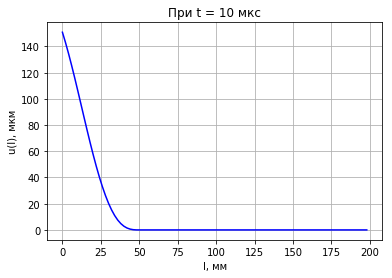

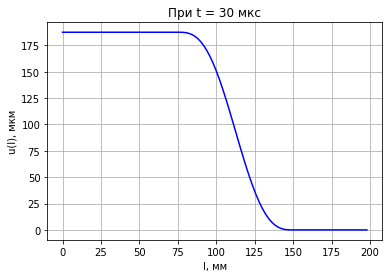

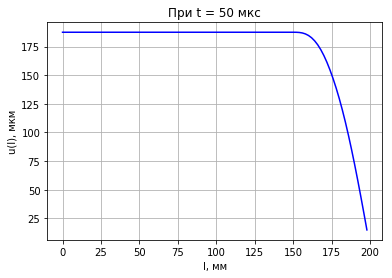

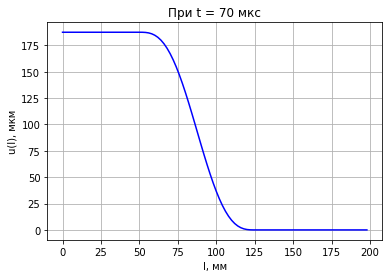

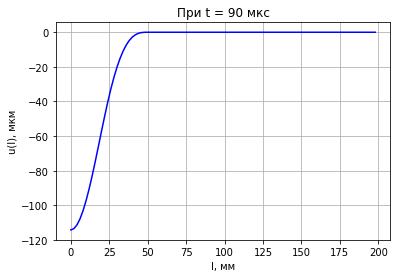

In [119]:
import matplotlib.pyplot as plt
time = 10
L_mm = [i * (10 ** 3) for i in L]
for i in  range(5):
    plt.figure(i)
    U_mkm = [i * (10 ** 6) for i in U(time * (10 ** (-6)))]
    plt.plot(L_mm, U_mkm, color = 'blue')
    plt.grid()
    plt.title("При t = %s мкс"% time)
    plt.xlabel('l, мм')
    plt.ylabel('u(l), мкм')
    time = time + 20

___

In [120]:
def SIGMA(t):
    ARR = []
    if t <= tau:
        for l_p in L:
            ARR.append(s_lt(l_p, t))
    else:
        for l_p in L:
            ARR.append(s_mt(l_p, t))
    return ARR

***Распределение напряжений в стержне $\sigma_{x}(l)$ от координаты, при разном времени***

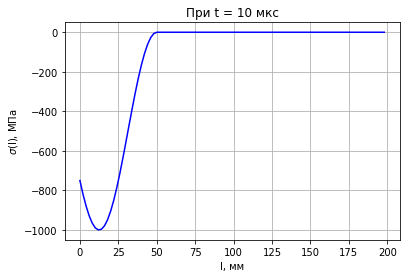

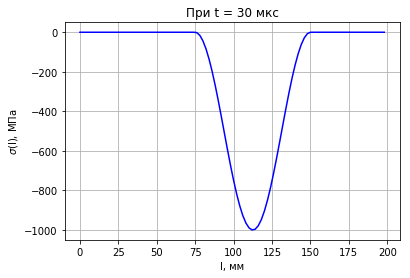

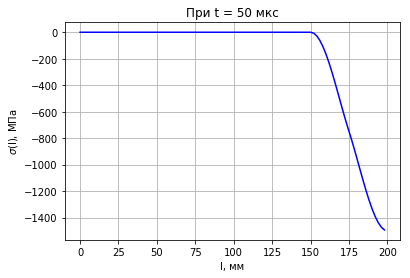

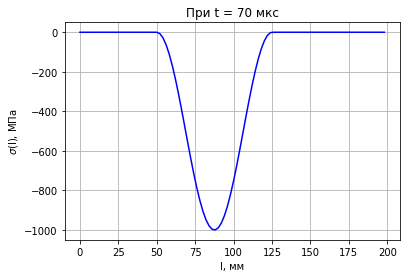

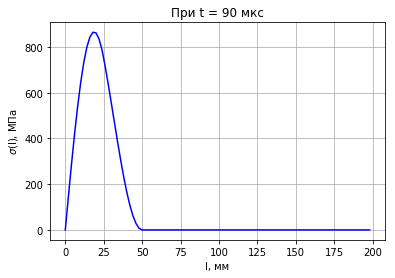

In [121]:
import matplotlib.pyplot as plt
time = 10
L_mm = [i * (10 ** 3) for i in L]
for i in  range(5):
    plt.figure(i)
    SIGMA_pa = [i / (10 ** 6) for i in SIGMA(time * (10 ** (-6)))]
    plt.plot(L_mm, SIGMA_pa, color = 'blue')
    plt.grid()
    plt.title("При t = %s мкс"% time)
    plt.xlabel('l, мм')
    plt.ylabel('$\sigma$(l), МПа')
    time = time + 20

___

In [122]:
T = []
i = 0
t_max = 250 * (10 ** (-6))
while i <= t_max:
    T.append(i)
    i = i + 0.01*t_max

In [123]:
SIGMA_T = []
for t_p in T:
    if t_p <= tau:
        SIGMA_T.append(s_lt(l, t_p))
    else:
        SIGMA_T.append(s_mt(l, t_p))

***Распределение напряжений в заделке $\sigma_{x}(t)$ от времени, при фиксированной коорденате (в заделке x = l)***

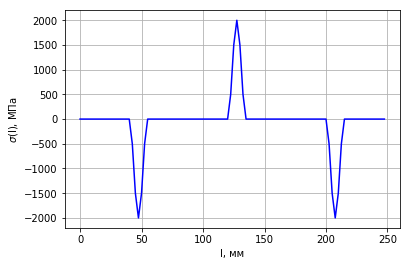

In [124]:
SIGMA_T = [i / (10 ** 6) for i in SIGMA_T]
T_mks = [i * (10 ** 6) for i in T]
plt.plot(T_mks, SIGMA_T, color = 'blue')
plt.grid()
plt.xlabel('l, мм')
plt.ylabel('$\sigma$(l), МПа')
time = time + 20

___

In [125]:
def Res_vtet1(x, t):
    A = f_0*c / (E*S)
    B = m.sin(2*m.pi*(l-x)/(tau*c))/m.cos(2*m.pi*l/(tau*c))
    C = m.sin(2*m.pi*t/tau)
    return A*B*C

In [164]:
def Res_vtet2(x, t):
    A = (32*f_0*l)/(E*S*(tau ** 2))
    summ = 0
    for n in range(0, 300):
        B = ((-1) ** n) / ((2*n + 1) ** 2)
        C = 1 / (((m.pi*c*(2*n+1)/(2*l)) ** 2) - ((2*m.pi/tau) ** 2))
        D = m.sin(m.pi/2*(2*n+1)*(l-x)/l)
        H = -m.sin(m.pi*c*(2*n+1)*t/(2*l)) #
        G = (m.pi*c*(2*n+1)/(2*l))
        summ = summ + A*B*C*D*H*G
    return summ

In [197]:
def vtet_lt(x,t):
    return Res_vtet1(x, t) + Res_vtet2(x, t)

In [198]:
def vtet_mt(x,t):
    A = (32*f_0*l)/(E*S*(tau ** 2))
    summ = 0
    for n in range(0, 300):
        B = ((-1) ** n) / ((2*n + 1) ** 2)
        C = 1 / (((m.pi*c*(2*n+1)/(2*l)) ** 2) - ((2*m.pi/tau) ** 2))
        D = m.sin(m.pi/2*(2*n+1)*(l-x)/l)
        H = -m.sin(m.pi*c*(2*n+1)*t/(2*l)) + m.sin(m.pi*c*(2*n+1)*(t - tau)/(2*l)) #
        G = (m.pi*c*(2*n+1)/(2*l))
        summ = summ + A*B*C*D*H*G
    return summ

In [199]:
def VTET(t):
    ARR = []
    if t <= tau:
        for l_p in L:
            ARR.append(vtet_lt(l_p, t))
    else:
        for l_p in L:
            ARR.append(vtet_mt(l_p, t))
    return ARR

***Распределение скоростей в стержне $\nu_{x}(l)$ от координаты, при разном времени***

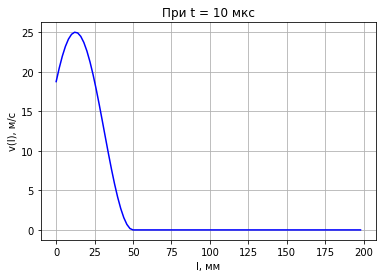

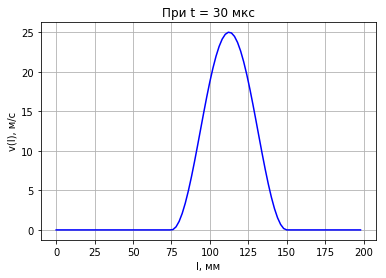

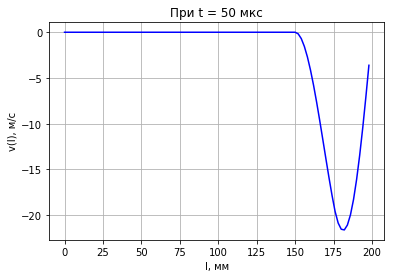

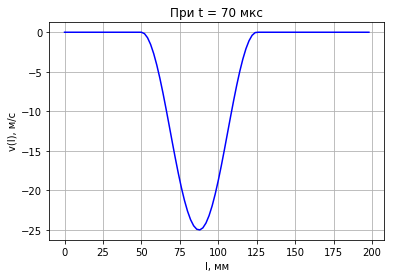

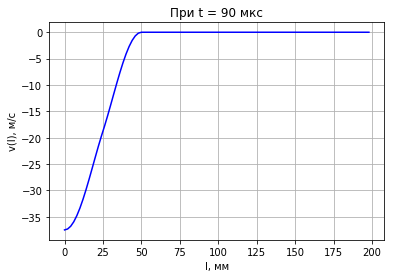

In [221]:
time = 10
for i in  range(5):
    plt.figure(i)
    plt.plot(L_mm, VTET(time * (10 ** (-6))), color = 'blue')
    plt.grid()
    plt.title("При t = %s мкс"% time)
    plt.xlabel('l, мм')
    plt.ylabel('v(l), м/c')
    time = time + 20